### Problem 1: Closed-Form Maximum Likelihood

**1.1**: The **functional Invariance** Property of Maximum Likelihood Estimate (MLE) states that, "If $\hat{\theta}$ is a Maximum Likelihood Estimate (MLE) of $\theta$ and if $g$ is a function, then $g(\hat{\theta})$ is an MLE of $g(\theta)$".

Assume that we are given $n$ iid samples $(x_1, ..., x_n)$ from $P(x \ | \ \theta)$ below:

$P(x \ | \ \theta) = \theta^x (1 - \theta)^{1 - x}$ for $x \in \{0, 1\}$

The MLE for the parameter $\theta$ of given distribution is $\frac{\sum_{i=1}^n x_i}{n}$. Now, let us consider $v = g(\theta) = (1 - \theta)$. Compute the MLE for the parameter $v$ of the distribution **without directly using the functional invariance property stated above**:

$P(x \ | \ v) = \theta^x (1 - \theta)^{1 - x}$ for $x \in \{0, 1\}$

**1.2**: Assume that we are given $2n$ iid samples $(x_1, ..., x_{2n})$ from $P(x \ | \ \theta)$ below. Compute the MLE for the parameter $\theta$ of given distribution.

$P(x \ | \ \theta) = \frac{1}{2} e^{-|x-\theta|}$

**1.1**:  
(a) The likelihood of observing the n iid samples $(x_1, ..., x_n)$ given the parameter $v$ of the given distribution is:  
$$
\begin{aligned}
L(v) &= p(x_1, ..., x_n \ | \ v) \\
&= \prod_{i=1}^n p(x_i \ | \ v) \\
&= \prod_{i=1}^n \theta^{x_i} (1 - \theta)^{1 - x_i} \\
&= \theta^{\sum_{i=1}^n x_i} (1 - \theta)^{n - \sum_{i=1}^n x_i} \\
&= (1 - v)^{\sum_{i=1}^n x_i} (v)^{n - \sum_{i=1}^n x_i} ---(i)--- \\
\end{aligned}
$$

The log likelihood is given by:
$$
\begin{aligned}
\log(L(v)) &= \sum_{i=1}^n x_i \log(1 - v) + (n - \sum_{i=1}^n x_i) \log(v) ---(ii)---
\end{aligned}
$$

The $v$ that maximizes likelihood function (i) also maximizes the log likelihood function (ii). To get the MLE for $v$, let's take the derivative of (ii) with respect to $v$ and equate it to 0:
$$
\begin{aligned}
\frac{\partial \log(L(v))}{\partial v} &= \frac{-\sum_{i=1}^n x_i}{1 - v} - \frac{n - \sum_{i=1}^n x_i}{v}  \\
\implies 0 &= \frac{-n + nv + \sum_{i=1}^n x_i}{v(1 - v)} \\
\implies 0 &= -n + nv + \sum_{i=1}^n x_i \\
\implies nv &= n - \sum_{i=1}^n x_i \\
\therefore v &= 1 - \frac{\sum_{i=1}^n x_i}{n}
\end{aligned}
$$

**1.2**:  
The likelihood of observing the $2n$ iid samples $(x_1, ..., x_{2n})$ given the parameter $\theta$ of the given distribution is:  
$$
\begin{aligned}
L(\theta) &= p(x_1, ..., x_{2n} \ | \ \theta) \\
&= \prod_{i=1}^{2n} p(x_i \ | \ \theta) \\
&= \prod_{i=1}^{2n} \frac{1}{2} e^{-|x_i - \theta|} ---(i)--- \\
\end{aligned}
$$
The log likelihood is given by:
$$
\begin{aligned}
\log(L(\theta)) &= \sum_{i=1}^{2n} \Big(-\log2 - |x_i - \theta| \Big) ---(ii)---
\end{aligned}
$$
The $\theta$ that maximizes likelihood function (i) also maximizes the log likelihood function (ii). To get the MLE for $\theta$, let's take the derivative of (ii) with respect to $\theta$ and equate it to 0:
$$
\begin{aligned}
\frac{\partial \log(L(\theta))}{\partial \theta} &= \sum_{i=1}^{2n} sgn(x_i - \theta)  \\
\implies 0 &= \sum_{i=1}^{2n} sgn(x_i - \theta) \\
\implies 0 &= \sum_{i=1}^{n} sgn(x_i - \theta) + \sum_{i=n+1}^{2n} sgn(x_i - \theta) \\
\end{aligned}
$$
If $x'_1, x'_2, ..., x'_{2n}$ denote the sorted (in ascending order) observed $2n$ iid samples, then the above equality will hold if $\theta = \text{any value in the open interval (x$'_n$, x$'_{n+1}$)}$. This is because such $\theta$ will make $\sum_{i=1}^{n} sgn(x'_i - \theta)$ equal $-n$ and $\sum_{i=n+1}^{2n} sgn(x'_i - \theta)$ equal $n$.

$\therefore \theta = \text{any value in (x$'_n$, x$'_{n+1}$), where x$'_n$ and x$'_{n+1}$ are $n^{th}$ and $(n+1)^{st}$ smallest observations respectively}$

### Problem 2: Gradient for Maximum Likelihood Estimation

Sometimes, we can't find MLEs in closed-form, in this case, we can use an iterative scheme to solve resulting optimization problem $\theta_{MLE} = \arg\max P(x \ | \ \theta)$. First-order iterative schemes (e.g. Gradient Descent, Stochastic Gradient Descent, Nesterov Accelerated Gradient Descent) require gradient information at each visited point. Compute gradients for log-likelihood of the following model:

- we have $X \in \mathbf R^{n \times d}$ - constant data matrix, $\mathbf x_i$ - vector corresponding to a single data point $(\mathbf x_i \in \mathbf R^{d})$
- $\theta$ is a $d$-dimensional (unknown) weight vector
- $\varepsilon \sim \text{Fisher's Z-distribution}(d_1, d_2)$ is a $n$-dimensional (unknown) noise vector
- and we observe vector $\mathbf y = X\theta + \varepsilon$

Which means that
$$ P(y_i \ | \ \mathbf x_i, \theta, d_1, d_2) = Z(d_1, d_2) \frac{e^{d_1(y_i - \theta^T \mathbf{x_i})}}{(d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2)^\frac{d_1+d_2}{2}} $$

where $Z$ stands for a constant that does not depend on $\theta$, and $d_1$ and $d_2$ are constant parameters.

Denote log-likelihood as $\mathcal L(\theta)$ and log-likelihood for a single sample $i$ as $\mathcal L_i(\theta) = \mathcal L(\theta \ | \ \mathbf x_i, y_i)$.

**2.1**: Find $\frac{\partial \mathcal L_i(\theta)}{\partial \theta}$.

**2.1**  
We have:
$$
\begin{aligned}
\mathcal L_i(\theta) &= \log \Big(Z(d_1, d_2) \frac{e^{d_1(y_i - \theta^T \mathbf{x_i})}}{(d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2)^\frac{d_1+d_2}{2}}\Big) \\
&= \log(Z(d_1,d_2)) + d_1(y_i - \theta^T \mathbf{x_i}) - \frac{d_1+d_2}{2} \log (d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2) \\
\end{aligned}
$$

Now:

$$
\begin{aligned}
\frac{\partial \mathcal L_i(\theta)}{\partial \theta} &= 0 + d_1 (-\mathbf{x_i}) - \frac{d_1+d_2}{2} \frac{1}{d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2} d_1 e^{2(y_i - \theta^T \mathbf{x_i})} (-2 \mathbf{x_i}) \\
&= -d_1 \mathbf{x_i} + d_1(d_1+d_2) \frac{e^{2(y_i - \theta^T \mathbf{x_i})}}{d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2} \mathbf{x_i}
\end{aligned}
$$

**2.2**: We check the result obtained in the previous section by coding an SGD for $\mathcal L(\theta)$ and plotting how function value changes as a function of a number of passed gradient steps. We try multiple learning rates (7e-2, 1e-3, 1e-6), and explain the result, considering $Z(d_1,d_2)=8$, $d_1=2$ and $d_2=2$ for plotting.

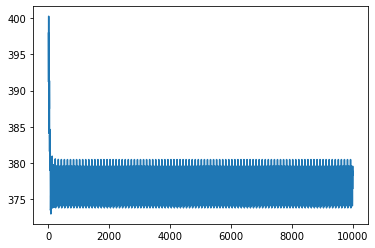

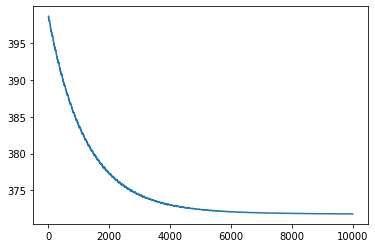

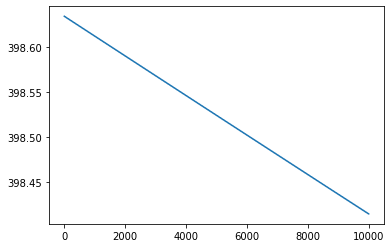

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100, d=10, d1=2, d2=2):
    X = np.random.rand(n, d)*2-1
    theta = np.random.rand(d, 1)
    noise = np.random.f(d1, d2, n).reshape((-1, 1))  # F-distribution
    noise = np.log(noise) / 2  # Fisher's Z-distribution
    return X, X @ theta + noise

def loss(X, y, theta):
    # we want to maximize log-likelihood and minimize loss. So, taking loss as the negative of log-likelihood
    l = -np.log(8) - 2.0 * np.sum(y - X @ theta) + 2.0 * np.sum(np.log(2 * np.exp(2 * (y - X @ theta)) + 2))
    return l

def loss_grad_i(X, y, theta, i):
    temp = y[i] - X[i] @ theta
    lg = (2 - 8 * (np.exp(2 * temp[0]) / (2 * np.exp(2 * temp[0]) + 2))) * (X[i][np.newaxis]).T
    return lg

def sgd_plot(theta_init, X, y, n_steps=100):
    for learning_rate in [7e-2, 1e-3, 1e-6]:
        theta = theta_init.copy()
        losses = []
        for step_n in range(n_steps):
            for i in range(X.shape[0]):
                theta = theta - learning_rate * loss_grad_i(X, y, theta, i)
                loss_i = loss(X, y, theta)
                losses.append(loss_i)
        plt.plot(losses)
        plt.show()
    
def main(n=100, d=10, d1=2, d2=1):
    X, y = generate_data(n, d, d1, d2)
    theta_init = np.random.rand(d, 1)
    sgd_plot(theta_init, X, y)
    
main()

**Answer:**  
With the learning rate of **_7e-2_**, the gradient descent doesn't seem to have converged and the loss value is rather showing oscillating behaviour. This is because the learning rate is high, which means the gradient descent is taking larger steps for updating $\theta$ and that is causing it to overshoot the minima and bounce along the ridges of the valley without converging.  

With the learning rate of **_1e-3_**, the gradient descent seems to have converged because the loss value is not decreasing any further. This indicates that this choice of learning rate is better.  

With the learning rate of **_1e-6_**, the loss value is decreasing quite slowly and doesn't seem to have converged yet. This is because, with small learning rate, gradient descent takes small steps for updating $\theta$ and therefore, is making very slow progress. This makes gradient descent converge very slowly (require many gradient steps).

### Problem 3: Logistic Regression

Assume that we observe data generated via the following model:

- $X \in \mathbf R^{n \times d}$ - constant data matrix
- $\theta_j \sim \mathcal N(0, \sigma_\theta)$; $\theta$ is $d$-dimensional random vector (`This is a prior information that` $\theta$ `follows normal distribution`)
- $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$; $\varepsilon$ is $n$-dimensional random noise vector distributed according to [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution
- and we observe $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$ - boolean random vector

or, in other words: there exists some data $X$, we sample weights vector $\theta$ of the corresponding shape from multivariate normal distribution, multiply features from $X$ by weights from $\theta$, add random logistically distributed noise to resulting numbers, and observe whether resulting (noisy) random variable exceeds zero. So we are given the data matrix X and y, we want to estimate the weight vector $\theta$ as accurately as possible. 

**`Show that given model definition above, the following holds:`**

**3.1**: $ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$

 where $ \text{logistic}(x) := \frac{1}{1+\exp(-x)}$ is a standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties), $\mathbf x_i$ denotes $i$-th data sample vector, $\mathbf 1[\dots]$ denotes indicator function.

**3.1**  
$$
\begin{aligned}
P(y_i = 1 \ | \ \theta, \mathbf x_i) &= P(\theta^T \mathbf x_i + \varepsilon \geq 0) \\
&= P(\varepsilon \geq - \theta^T \mathbf x_i) \\
&= 1 - P(\varepsilon \lt - \theta^T \mathbf x_i) \\
&= 1 - P(\varepsilon \leq - \theta^T \mathbf x_i) \quad [\because P(\varepsilon = - \theta^T \mathbf x_i) = 0] \\
&= 1 - \frac{1}{1 + e^{\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}}} \quad [\because \varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)] \\
&= \frac{e^{\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}}}{1 + e^{\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}}} \\
&= \frac{1}{1 + e^{\frac{-\theta^T \mathbf x_i}{\sigma_\epsilon}}} \\
&= \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)
\end{aligned}
$$

Let us consider $\sigma_{\epsilon} = 1$ everywhere further.

**3.2**: $ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

**3.2**  
From 3.1, when $\sigma_{\epsilon} = 1$, we have:  
$$
\begin{aligned}
P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}(\theta^T \mathbf x_i) ---(i)--- \\
\end{aligned}
$$

Since $\mathbf y$ is a Boolean vector, $y_i$ can be either 0 or 1.

$$
\therefore P(y_i = 0 \ | \ \theta, \mathbf x_i) = 1 - \text{logistic}(\theta^T \mathbf x_i) ---(ii)--- \\
$$

From (i) and (ii),  
$$P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$$

**3.3**: $ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$

**3.3**  
From 3.2,  
$$P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$$

Taking nautural log on both sides,

$$
\begin{aligned}
\log(P(y_i \ | \ \theta, \mathbf x_i)) &= y_i \log(\text{logistic}(\theta^T \mathbf x_i)) + (1-y_i) \log(1-\text{logistic}(\theta^T \mathbf x_i)) \\
&= y_i \log \Big(\frac{1}{1+e^{-\theta^T \mathbf x_i}} \Big) + (1-y_i) \log \Big(1-\frac{1}{1+e^{-\theta^T \mathbf x_i}} \Big) \\
&= y_i \log \Big(\frac{1}{1+e^{-\theta^T \mathbf x_i}} \Big) + \log \Big(\frac{e^{-\theta^T \mathbf x_i}}{1+e^{-\theta^T \mathbf x_i}} \Big) - y_i \log \Big(\frac{e^{-\theta^T \mathbf x_i}}{1+e^{-\theta^T \mathbf x_i}} \Big) \\
&= y_i \log \Big(\frac{1}{1+e^{-\theta^T \mathbf x_i}} * \frac{1+e^{-\theta^T \mathbf x_i}}{e^{-\theta^T \mathbf x_i}} \Big) + \log \Big(\frac{1}{1+e^{\theta^T \mathbf x_i}} \Big) \\
&= y_i \log(e^{\theta^T \mathbf x_i}) - log(1+e^{\theta^T \mathbf x_i}) \\
&= y_i \theta^T \mathbf x_i - log(1+e^{\theta^T \mathbf x_i})
\end{aligned}
$$

The vector $\mathbf 1_{n \times 1}$ denotes column of ones.

**3.4**: $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $

**3.4**  
$$ P(\mathbf y \ | \ X, \theta) = \prod_{i=1}^{n} (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)} $$

Taking natural log on both sides,

$$
\begin{aligned}
\log (P(\mathbf y \ | \ X, \theta)) &= \sum_{i=1}^{n} \log \Big((\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)} \Big) \\
&= \sum_{i=1}^{n} \Big(y_i \log(\text{logistic}(\theta^T \mathbf x_i) + (1-y_i) \log(1-\text{logistic}(\theta^T \mathbf x_i)) \Big) \\
&= \mathbf y^T \log(\text{logistic}(X \theta)) + (\mathbf 1_{n \times 1}- \mathbf y)^T \log(\mathbf 1_{n \times 1}-\text{logistic}(X \theta)) \\
&= \mathbf y^T \log(\mathbf 1_{n \times 1} \oslash (\mathbf 1_{n \times 1}+e^{-X \theta})) + (\mathbf 1_{n \times 1}- \mathbf y)^T \log(\mathbf 1_{n \times 1}- \mathbf 1_{n \times 1} \oslash (\mathbf 1_{n \times 1}+e^{-X \theta})) \quad \text{[where, $\oslash$ is element-wise division operator]} \\
&= \mathbf y^T \log(\mathbf 1_{n \times 1} \oslash (\mathbf 1_{n \times 1}+e^{-X \theta})) + (\mathbf 1_{n \times 1}- \mathbf y)^T \log(e^{-X \theta} \oslash (\mathbf 1_{n \times 1}+e^{-X \theta})) \\
&= \mathbf y^T \log((\mathbf 1_{n \times 1} \oslash (\mathbf 1_{n \times 1}+e^{-X \theta})) \odot ((\mathbf 1_{n \times 1}+e^{-X \theta}) \oslash e^{-X \theta})) + \mathbf 1_{n \times 1}^T \log(e^{-X \theta} \oslash (\mathbf 1_{n \times 1}+e^{-X \theta})) \: \text{[where, $\odot$ is element-wise multiplication operator]} \\
&= \mathbf y^T \log(\mathbf 1_{n \times 1} \oslash e^{-X \theta}) + \mathbf 1_{n \times 1}^T \log(\mathbf 1_{n \times 1} \oslash (\mathbf 1_{n \times 1} + e^{X \theta})) \\
&= \mathbf y^T \log(e^{X \theta}) - \mathbf 1_{n \times 1}^T \log(\mathbf 1_{n \times 1} + e^{X \theta}) \\
&= \mathbf y^T X \theta - \mathbf 1_{n \times 1}^T \log(\mathbf 1_{n \times 1} + e^{X \theta}) \\
\end{aligned}
$$

**3.5**: $\frac{\partial \mathcal L_{MLE}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) $

**3.5**  
$$
\begin{aligned}
\frac{\partial \mathcal L_{MLE}(\theta)}{\partial \theta} &= \frac{\partial (\mathbf y^T X \theta - \mathbf 1_{n \times 1}^T \log(\mathbf 1_{n \times 1} + e^{X \theta}))}{\partial \theta} \\
&= \frac{\partial (\mathbf y^T X \theta)}{\partial \theta} - \frac{\partial (\mathbf 1_{n \times 1}^T \log(\mathbf 1_{n \times 1} + e^{X \theta}))}{\partial \theta} \\
&= (\mathbf y^T X)^T - X^T (e^{X \theta} \oslash (\mathbf 1_{n \times 1} + e^{X \theta})) \quad \text{[where, $\oslash$ is element-wise division operator]} \\
&= X^T \mathbf y - X^T (\mathbf 1_{n \times 1} \oslash (\mathbf 1_{n \times 1} + e^{-X \theta})) \\
&= X^T(\mathbf y - \text{logistic}(X\theta))
\end{aligned}
$$

### Problem 4: Coding Logistic Regression


Here's the code that generates data according to model specification (**Problem 3**).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_logistic_regression_data(n_samples=200, k_featues=2, sigma_eps=0.1, 
                                      sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4):
    assert 0 <= feature_correlation_rate <= 1
    X_noncorr = np.random.rand(n_samples, k_featues)*2-1 # [0, 1] -> [-1, 1] center around zero
    mixture_matrix = np.eye(k_featues)*(1-feature_correlation_rate) + feature_correlation_rate/k_featues
    X = X_noncorr @ mixture_matrix
    theta_real = np.random.normal(scale=sigma_theta, size=k_featues)[:, np.newaxis] # column
    noise = np.random.logistic(scale=sigma_eps, size=n_samples)[:, np.newaxis]
    y = ((X @ theta_real + noise) > 0).astype(np.int16)
    split_idx = int(n_samples * train_test_ratio / (train_test_ratio + 1))
    return X[:split_idx, :], y[:split_idx], X[split_idx:, :], y[split_idx:], theta_real

**4.1**: We write Gradient Descent and Stochastic Gradient Descent algorithm for the MLE loss and plot -

- MLE loss
- Decision Boundary (for 2D data)

Using results from **3.5**. Note that our loss is $loss(\theta) = -\mathcal L(\theta)$ and it is usually referred to as "the negative log-likelihood".

In [3]:
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.cm as cm

def logistic_loss(X, y, theta_current, lambd):
    l = -(y.T @ X @ theta_current - (np.ones((X.shape[0], 1))).T @ np.log(1 + np.exp(X @ theta_current)))
    return l[0][0]

def logistic_loss_gradient(X, y, theta_current, lambd):
    lg = -(X.T @ (y - (1 / (1 + np.exp(-X @ theta_current)))))
    return lg

def logistic_loss_single_gradient(X, y, smaple_id, theta_current, lambd):
    x_i = X[smaple_id].reshape((1, -1))
    y_i = y[smaple_id].reshape((1, 1))
    return logistic_loss_gradient(x_i, y_i, theta_current, lambd)

def logistic_classification_accuracy(X, y, theta_current):
    y_pred = ((X @ theta_current) > 0).astype(np.int16)
    accuracy = (y_pred == y).mean()
    return accuracy

def run_MLE_gd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        theta = theta - learning_rate * logistic_loss_gradient(X, y, theta, lambd)
        steps.append(theta)
    return steps

def run_MLE_sgd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        for smaple_id in range(X.shape[0]):
            theta = theta - learning_rate * logistic_loss_single_gradient(X, y, smaple_id, theta, lambd)
        steps.append(theta)
    return steps

We plot (for 2D data) all the train and test set points and then plot the decision boundary on the same plot  by filling in the missing code below.

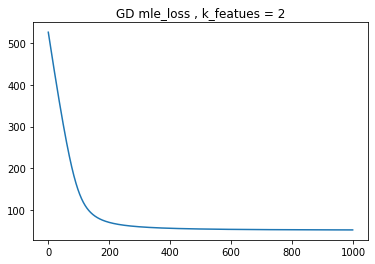

gd runtime: 0.15352997200011487


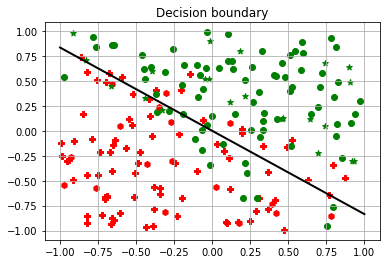

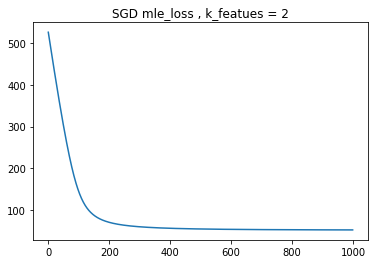

sgd runtime: 1.7600907789999383


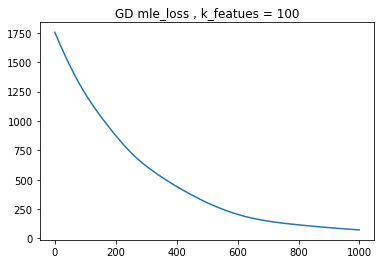

gd runtime: 0.44075699199993323


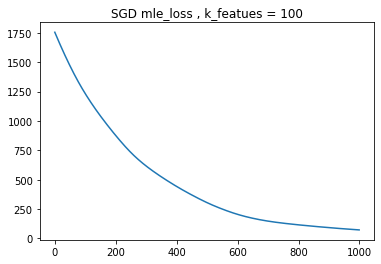

sgd runtime: 1.7404355060000398


In [4]:
import time

def plot_decision_boundary(X_train, y_train, X_test, y_test, theta):
    indexes_with_class1_train = (y_train==1).reshape(1,-1)[0]
    indexes_with_class1_test = (y_test==1).reshape(1,-1)[0]
    plt.title('Decision boundary')
    plt.scatter(X_train[indexes_with_class1_train][:,0],X_train[indexes_with_class1_train][:,1], color='r', marker='P')
    plt.scatter(X_train[~indexes_with_class1_train][:,0],X_train[~indexes_with_class1_train][:,1], color='g', marker='o')
    plt.scatter(X_test[indexes_with_class1_test][:,0],X_test[indexes_with_class1_test][:,1], color='r', marker='h')
    plt.scatter(X_test[~indexes_with_class1_test][:,0],X_test[~indexes_with_class1_test][:,1], color='g', marker='*')
    plt.grid()

    # weightplot
    epsilon=1e-18
    slope = (-theta[0])/(theta[1] + epsilon) # to ensure no division by zero
    xx = np.linspace(-1, 1, 20)
    yy = slope * xx
    plt.plot(xx,yy,color='k', linestyle='-', linewidth=2)
    plt.show()


def main():
    for k_features in [2, 100]:
        data_args = {'n_samples': 200, 'k_featues': k_features, 'sigma_eps': 0.3, 
                     'sigma_theta': 5, 'feature_correlation_rate': 0}
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        lambd = 0
        
        now = time.perf_counter()
        steps = run_MLE_gd(X_train, y_train, lambd, learning_rate=1e-3, max_epoch_n=1000)
        losses = [float(logistic_loss(X_train, y_train, thetaa, lambd)) for thetaa in steps]
        plt.plot(losses)
        plt.title('GD mle_loss , k_featues = %d' % k_features)
        plt.show()
        print('gd runtime:', time.perf_counter() - now)

        if k_features == 2:
            plot_decision_boundary(X_train, y_train, X_test, y_test, steps[-1])
        
        now = time.perf_counter()
        steps = run_MLE_sgd(X_train, y_train, lambd, learning_rate=1e-3, max_epoch_n=1000)
        losses = [float(logistic_loss(X_train, y_train, thetaa, lambd)) for thetaa in steps]
        plt.plot(losses)
        plt.title('SGD mle_loss , k_featues = %d' % k_features)
        plt.show()
        print('sgd runtime:', time.perf_counter() - now)
        
        plt.show()
    
main()

SGD is computationally expensive due to the fact that it uses all resources for processing one training example at a time and also because it can't take the advantage of vectorized operations, and is hence slower than GD.